# Previsão do PIB brasileiro com técnica de Nowcasting
---
* O Nowcasting é uma abordagem moderna de monitorar as condições econômicas em tempo real. Diferentemente das técnicas de previsão tradicionais, o nowcasting está preocupado em prever os indicadores enqunto estamos dentro do período de referência, ou logo após. Não há interesse em previsões maior prazo.
* O método mais utilizado é o modelo de fator dinâmico, que condensa a informação de várias séries de dados em um pequeno número de fatores. 
* O filtro de Kalman gera projeções para todas as séries de dados e estimativas para cada lançamento. Quando há o anúncio de novos dados, há uma alteração no modelo, chamado de notícias.
* Nos últimos anos, modelos de machine learning, como SVM, LASSO, elastic net e redes neurais, foram implantados para melhorar o poder preditivo dos nowcastings.

## Objetivo
> O objetivo desta análise é fazer um Nowcasting do PIB trimestral brasileiro com base em mais de 30 variáveis. Para isso, utilizaremos o pacote nowcasting que permite a estimação de modelos de fatores dinâmicos. Assim, é possível obter novas estimativas do PIB a cada novo lançamento de variável. 

## Problema
* Quais variáveis escolher
* Coleta dos dados
* Tratamento e normalização dos dados 
* Correlação das variáveis
* Escolha do modelo
* Estimação, treino e acurácia
* Previsão 
* Comunicação dos resultados

### Pacotes
---

In [45]:
#install.packages("sidrar")


In [44]:
#devtools::install_github('wilsonfreitas/rbcb')

In [4]:
library(tidyverse)
library(zoo)
library(fredr)
library(nowcasting)
library(Quandl)
#library(BETS)
library(lubridate)
library(sidrar)
library(gtrendsR)
library(ipeadatar)
#library(knitr)
library(rbcb)


In [5]:
fredr_set_key("f9f7fab6e4d32d35a8c462370ced5ac4")
Quandl.api_key(Sys.getenv("key_quandl"))

# Extração dos dados

> Utilizaremos múltiplas fontes para a obtenção dos dados que serão aplicados na previsão. O objetivo disso é fornecer um certo grau de expansibilidade a esse exercício. Com pouco esforço, é possível incluir diferentes variáveis destas mesmas fontes. Serão três fontes nacionais (Ipeadatar, BETS e sidrar) e duas internacionais (fredr e Quandl), além do pacote gtrendsR, que faz buscas de termos com o google trends. 

## IpeaData
---
* Do Ipeadata selecionamos, em ordem: Rendimento bruto real médio - PNADC, Pessoas na força de trabalho - PNADC, Taxa de desocupação - PNADC, CAGED, Ibovespa,  LTN - 12 meses, Exportações, Importações, Meio de Pagamento(M1), Taxa de câmbio, Índice de Atividade Econômica do Banco Central.

### rendimento

In [11]:
rendimento = ipeadata("PNADC12_RRTH12") %>%
    select(date, value)
rendimento = as.ts(read.zoo(rendimento[,c(1,2)], FUN=as.yearmon))
rendimento

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,,,2375,2387,2379,2384,2396,2403,2400,2398,2395,2392
2013,2401,2418,2431,2437,2440,2461,2477,2493,2493,2500,2492,2473
2014,2470,2494,2520,2519,2517,2505,2501,2517,2525,2535,2519,2521
2015,2527,2521,2522,2515,2503,2509,2490,2478,2477,2466,2447,2436
2016,2443,2427,2446,2427,2436,2410,2413,2435,2431,2436,2440,2452
2017,2461,2467,2481,2470,2467,2458,2459,2456,2468,2475,2485,2484
2018,2494,2505,2505,2514,2514,2512,2503,2514,2504,2506,2509,2523
2019,2538,2547,2538,2526,2508,2506,2500,2510,2507,2527,2538,2532
2020,2538,2539,2559,2589,2632,2678,2714,2713,2714,2673,2639,2602
2021,2595,2573,2580,2549,2547,,,,,,,


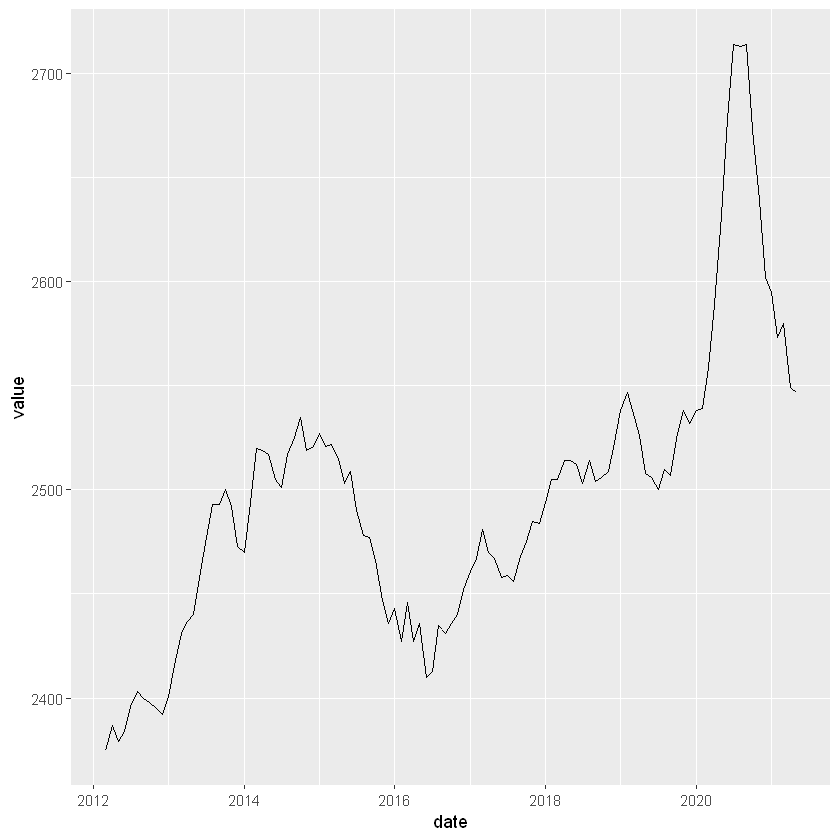

In [10]:
rendimento %>%
    ggplot(aes(x=date, y=value))+geom_line()

### Força de trabalho: forca_trabalho


In [13]:
forca_trabalho = ipeadata("PNADC12_FT12") %>%
    select(date, value)
forca_trabalho  = as.ts(read.zoo(forca_trabalho[,c(1,2)], FUN = as.yearmon))
forca_trabalho

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,,,95191,95833,96179,96375,96342,96458,96454,96362,96386,96468
2013,96473,96577,96702,97032,97195,97323,97481,97423,97460,97356,97514,97416
2014,97330,97594,97783,98076,98178,98300,98223,98217,98456,98637,98636,98805
2015,98934,99187,99438,99687,99743,100050,100293,100419,100557,100847,100763,100818
2016,100727,101010,101239,101559,101804,101902,101854,101688,101391,101467,101884,102150
2017,102324,102447,102684,102851,103030,103298,103587,103767,103859,103892,104132,104037
2018,104015,103842,103907,103790,103776,103864,104193,104454,104783,104928,105078,104888
2019,104916,104933,105250,105543,105931,106108,106153,106195,106315,106421,106279,106184
2020,106065,106052,105073,102052,98646,96138,95158,95460,96556,98361,99601,100104
2021,100297,100322,100455,100701,101502,,,,,,,


### desemprego

In [14]:
desemprego = ipeadata("PNADC12_TDESOC12") %>% select(date, value ) 
desemprego  = as.ts(read.zoo(desemprego[,c(1,2)], FUN = as.yearmon))
desemprego

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,,,7.9,7.7,7.6,7.5,7.4,7.3,7.1,6.9,6.8,6.9
2013,7.2,7.7,8.0,7.8,7.6,7.4,7.3,7.1,6.9,6.7,6.5,6.2
2014,6.4,6.7,7.2,7.1,7.0,6.8,6.9,6.9,6.8,6.6,6.5,6.5
2015,6.8,7.4,7.9,8.0,8.1,8.3,8.5,8.7,8.9,8.9,9.0,8.9
2016,9.5,10.2,10.9,11.2,11.2,11.3,11.6,11.8,11.8,11.8,11.8,12.0
2017,12.6,13.2,13.7,13.6,13.3,13.0,12.8,12.6,12.4,12.2,12.0,11.8
2018,12.2,12.6,13.1,12.9,12.7,12.4,12.3,12.1,11.9,11.7,11.6,11.6
2019,12.0,12.4,12.7,12.5,12.3,12.0,11.8,11.8,11.8,11.6,11.2,11.0
2020,11.2,11.6,12.2,12.6,12.9,13.3,13.8,14.4,14.6,14.3,14.1,13.9
2021,14.2,14.4,14.7,14.7,14.6,,,,,,,


### caged

In [15]:
caged = ipeadata("CAGED12_SALDON12") %>%
    select(date, value)
caged_2 = ipeadata("CAGED12_SALDO12") %>%
    select(date, value)
caged = rbind(caged, caged_2)
caged  = as.ts(read.zoo(caged [,c(1,2)], FUN = as.yearmon))
caged 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,,,,,97182,58109,8057,13306,7207,17439,-16170,-243121
2000,31198,88175,39947,125071,162837,142884,105842,78845,92678,15442,466,-225789
2001,48796,80243,34484,139997,161898,108571,71386,47327,80028,77187,-4915,-253923
2002,44228,82013,90260,175090,155813,133346,61227,78022,167312,36368,-11751,-249514
2003,35485,84029,21261,154024,140313,125795,37233,79772,161765,70870,34804,-299918
2004,100106,139074,108212,187547,291822,207895,202033,229757,199742,130159,79022,-352093
2005,115972,73285,102965,266095,212450,195536,117473,135460,189458,118175,13831,-286719
2006,86616,176632,76455,229803,198837,155455,154357,128915,176735,129795,32579,-317493
2007,105468,148019,146141,301991,212217,181667,126992,133329,251168,205260,124554,-319414
2008,142921,204963,206556,294522,202984,309442,203218,239123,282841,61401,-40821,-654946


### bovespa

In [119]:
bovespa = ipeadata("ANBIMA12_IBVSP12") %>% select(date, value )
bovespa = as.ts(read.zoo(bovespa[,c(1,2)], FUN = as.yearmon))
bovespa

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1968,,14.08711770,9.50446791,22.10682493,8.62697448,-8.72483221,-0.55147059,3.45040049,11.19714116,-4.71344403,2.07982012,14.37224670
1969,12.03659124,23.72152987,3.43869399,10.47683009,28.90577508,-4.36217873,32.02662722,13.55742297,-7.08765006,-1.59292035,-10.80935252,10.78846542
1970,2.38441937,8.37333333,-1.27952756,-2.55898970,1.77353342,-5.59651475,15.61945332,-1.73472521,15.51320106,-6.31593184,10.10538473,11.45928937
1971,26.54981767,1.94274029,14.38862041,19.53766441,55.70818885,-9.48608137,11.34610835,-16.23677389,-3.04890422,-9.17272775,-12.78373084,19.61159918
1972,-13.57963331,4.96517349,-9.41190795,-6.35080645,3.83925368,-14.21561852,-14.28341255,22.34022556,-9.14189137,-15.63371946,6.19362598,-5.01132503
1973,-1.25186289,-4.86970520,11.22157589,28.06200076,-8.65820153,-0.96740102,3.25069775,8.96803943,-2.80169269,-7.49136766,-4.18695229,-10.66226287
1974,10.27585553,9.49024327,11.61969066,-20.22930295,-4.51459307,-0.33244067,14.09246734,-0.44664609,-12.48878375,-4.17598807,17.27626459,19.55043132
1975,2.08145424,-1.33895195,0.29622486,0.87231266,14.16314858,30.42466897,9.74527827,-12.42603550,8.58393605,-6.92375110,-4.00188324,-4.70819029
1976,20.43232115,3.67521368,-11.21187139,0.32497679,13.69736233,14.52991453,-6.46766169,2.88753799,-7.27474151,-15.37236161,8.28235294,4.73707084
1977,10.70539419,-1.76161919,8.35558947,-0.66901408,-1.06345268,-0.85990684,2.05999277,11.47308782,9.75222363,-0.54992764,-4.65657742,3.69352869


### taxa_juros

In [120]:
taxa_juros  = ipeadata("ANBIMA12_TJTLN1212") %>% select(date, value ) 
taxa_juros  = as.ts(read.zoo(taxa_juros[,c(1,2)], FUN = as.yearmon))
taxa_juros

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,,,,19.465261,21.681500,19.541957,18.289367,17.248570,17.182865,17.427724,18.231730,17.372935
2001,16.009091,16.030861,17.875545,20.819520,22.410086,22.395060,25.972650,25.205100,25.998226,25.662791,21.704820,21.428285
2002,20.442464,20.066728,18.815825,19.100037,20.692421,26.037437,28.415929,28.796274,27.311057,31.864306,33.586643,32.201190
2003,28.119707,29.684832,28.138087,25.636490,23.586443,22.723090,21.359045,21.270023,18.849777,18.008784,17.364313,15.941937
2004,15.493457,15.648925,15.552168,15.670836,17.782658,18.182693,17.261819,18.017006,18.167469,17.900730,18.302976,18.057790
2005,18.533403,19.041963,19.014377,19.441986,19.191963,18.664373,18.346100,18.451068,18.287175,18.063714,17.476793,16.803858
2006,16.299535,15.674318,15.088297,14.811237,15.013319,15.300148,14.681394,14.400129,13.835048,13.381500,13.019448,12.635023
2007,12.452903,12.240622,12.051429,11.716360,11.147247,10.932614,10.842484,11.349297,11.349013,11.279352,11.466124,11.843410
2008,12.064760,11.978064,12.315106,12.887367,13.720269,14.131450,14.604865,14.644561,14.741300,14.898158,15.137950,13.066140
2009,11.670890,11.110419,10.243123,9.962862,9.646626,9.375517,9.176200,9.213868,9.397720,9.957377,9.961290,10.322352


### exportacoes

In [121]:
exportacoes  = ipeadata("PAN12_XTV12") %>% select(date, value ) 
exportacoes  = as.ts(read.zoo(exportacoes[,c(1,2)], FUN = as.yearmon))
exportacoes

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,2970.123,2945.832,3786.857,3382.444,4200.079,4109.735,3977.190,4548.873,4161.430,4401.905,4060.417,3871.264
1996,3473.218,3409.779,3420.130,4276.872,4487.161,3829.561,4446.462,4378.512,4119.129,4176.299,3907.773,3786.217
1997,3672.500,3141.828,3821.745,4611.467,4625.771,4814.143,5219.440,5055.730,4578.390,4795.210,3970.439,4515.894
1998,3912.698,3711.707,4268.623,4567.741,4603.798,4891.353,4967.523,3979.568,4514.717,4004.125,3707.278,3979.419
1999,2954.971,3277.473,3812.734,3696.168,4390.466,4319.420,4128.038,4284.480,4302.798,4343.801,4058.493,4695.319
2000,3487.650,4185.832,4463.114,4186.145,5089.368,4858.439,5077.954,5540.130,4712.000,4637.916,4391.042,4683.743
2001,4539.541,4068.986,5174.088,4737.981,5352.274,5044.700,4966.394,5734.230,4768.936,5004.383,4511.959,4360.570
2002,3998.872,3663.892,4271.627,4637.957,4433.331,4067.454,6223.855,5769.435,6506.549,6471.604,5123.011,5259.137
2003,4807.966,5006.760,5239.147,5711.584,6392.537,5878.793,6104.708,6410.824,7275.980,7551.955,5988.185,6743.216
2004,5823.436,5749.205,7922.372,6580.059,7942.824,9323.607,8983.391,9048.431,8906.530,8837.167,8146.817,9179.077


### importacoes

In [122]:
importacoes  = ipeadata("PAN12_MTV12") %>% select(date, value ) 
importacoes  = as.ts(read.zoo(importacoes[,c(1,2)], FUN = as.yearmon))
importacoes

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,3368.851,4097.458,4806.341,3948.134,4981.778,4981.208,4087.334,4545.822,3771.912,4160.394,4221.285,4016.590
1996,3523.472,3518.657,3960.323,4157.160,4333.518,4251.916,4889.842,4744.567,4831.256,5579.459,4838.928,5718.171
1997,2596.698,4333.772,4811.742,5623.871,4810.785,5297.244,5872.133,5458.328,5524.028,5733.334,5351.122,5387.503
1998,4731.476,4032.599,5257.197,4718.676,4825.953,4794.282,5484.990,4246.084,5830.550,5549.638,4825.879,4544.366
1999,3756.939,3255.480,4146.508,3764.985,4176.874,4550.710,4123.072,4556.580,4333.580,4550.454,4626.160,4538.196
2000,3659.477,4137.006,4543.342,4087.125,4788.396,4696.682,4977.969,5516.064,5144.172,5278.671,5143.338,4963.755
2001,5116.012,4096.343,5543.524,4705.064,5254.648,4855.755,4951.184,5193.749,4253.561,4853.281,4307.875,3598.799
2002,3897.212,3490.026,3757.317,4236.021,4160.865,3495.146,5118.480,4268.896,4096.493,4377.524,3943.052,3536.248
2003,3736.884,3978.123,3787.840,4076.842,3942.108,3608.050,4135.136,3819.528,4710.707,5119.736,4356.197,4091.732
2004,4303.111,3846.530,5431.200,4720.770,4923.282,5621.892,5621.060,5714.177,5843.594,5931.309,6169.710,5778.179


### moeda

In [123]:
moeda = ipeadata("BM12_M1MN12") %>% select(date, value ) 
moeda = as.ts(read.zoo(moeda[,c(1,2)], FUN = as.yearmon))
moeda

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,3.003636e-07,3.050909e-07,3.192727e-07,3.403636e-07,3.567273e-07,3.843636e-07,4.000000e-07,4.043636e-07,4.214545e-07,4.374545e-07,4.596364e-07,5.145455e-07
1981,5.087273e-07,4.978182e-07,5.163636e-07,5.425455e-07,5.549091e-07,5.840000e-07,6.167273e-07,6.374545e-07,6.647273e-07,7.229091e-07,7.734545e-07,8.905455e-07
1982,9.414545e-07,9.392727e-07,9.338182e-07,9.843636e-07,1.037818e-06,1.114909e-06,1.177818e-06,1.235273e-06,1.250909e-06,1.362909e-06,1.456364e-06,1.640364e-06
1983,1.649455e-06,1.726182e-06,1.695273e-06,1.780727e-06,1.813818e-06,1.919636e-06,2.140364e-06,2.153818e-06,2.357455e-06,2.549818e-06,2.712000e-06,3.236000e-06
1984,3.372000e-06,3.302545e-06,3.578545e-06,3.928364e-06,4.198545e-06,4.550909e-06,5.030182e-06,5.359636e-06,5.942182e-06,6.445818e-06,7.060727e-06,9.060727e-06
1985,9.245818e-06,9.829818e-06,1.066145e-05,1.181127e-05,1.275200e-05,1.451745e-05,1.670327e-05,1.885927e-05,2.202400e-05,2.375818e-05,2.682255e-05,3.695273e-05
1986,3.821927e-05,4.141236e-05,6.790182e-05,8.448873e-05,1.004382e-04,1.131036e-04,1.193164e-04,1.224542e-04,1.304076e-04,1.363207e-04,1.413487e-04,1.554716e-04
1987,1.362284e-04,1.180098e-04,1.222127e-04,1.358000e-04,1.281924e-04,1.405596e-04,1.698556e-04,1.915782e-04,2.065196e-04,2.297655e-04,2.545898e-04,3.363156e-04
1988,3.312727e-04,3.381818e-04,3.632727e-04,4.276364e-04,4.978182e-04,5.770909e-04,6.621818e-04,7.425455e-04,9.465455e-04,1.139273e-03,1.408000e-03,2.139636e-03
1989,2.593091e-03,3.054545e-03,3.475273e-03,4.015273e-03,5.078909e-03,5.399273e-03,5.928727e-03,6.886545e-03,8.806909e-03,1.166327e-02,1.601055e-02,2.966327e-02


### dolar

In [124]:
dolar = ipeadata("PAN12_ERV12") %>% select(date, value ) 
dolar = as.ts(read.zoo(dolar[,c(1,2)], FUN = as.yearmon))
dolar

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1930,3.272727e-15,3.272727e-15,3.163636e-15,3.090909e-15,3.090909e-15,3.200000e-15,3.381818e-15,3.672727e-15,3.600000e-15,3.454545e-15,3.454545e-15,3.781818e-15
1931,3.963636e-15,4.254545e-15,4.618182e-15,5.054545e-15,5.454545e-15,4.872727e-15,5.090909e-15,5.709091e-15,5.854545e-15,5.854545e-15,5.854545e-15,5.781818e-15
1932,5.781818e-15,5.781818e-15,5.490909e-15,5.490909e-15,5.018182e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15
1933,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.836364e-15,4.581818e-15,4.509091e-15,4.400000e-15,4.363636e-15,4.327273e-15,4.254545e-15
1934,4.290909e-15,4.327273e-15,4.290909e-15,4.254545e-15,6.545455e-15,5.854545e-15,5.745455e-15,5.418182e-15,5.127273e-15,4.981818e-15,5.200000e-15,5.454545e-15
1935,5.527273e-15,5.490909e-15,5.854545e-15,6.072727e-15,6.581818e-15,6.690909e-15,6.690909e-15,6.763636e-15,6.618182e-15,6.363636e-15,6.545455e-15,6.581818e-15
1936,6.400000e-15,6.254545e-15,6.472727e-15,6.436364e-15,6.436364e-15,6.327273e-15,6.254545e-15,6.218182e-15,6.181818e-15,6.181818e-15,6.181818e-15,6.109091e-15
1937,5.963636e-15,5.963636e-15,5.927273e-15,5.781818e-15,5.636364e-15,5.527273e-15,5.490909e-15,5.490909e-15,5.563636e-15,6.109091e-15,6.254545e-15,6.363636e-15
1938,6.400000e-15,6.400000e-15,6.400000e-15,6.400000e-15,6.400000e-15,6.400000e-15,6.400000e-15,6.436364e-15,6.436364e-15,6.436364e-15,6.436364e-15,6.436364e-15
1939,6.436364e-15,6.436364e-15,6.472727e-15,NA,NA,NA,NA,NA,NA,NA,NA,NA


### atividade_economica

In [125]:
atividade_economica  = ipeadata("SGS12_IBCBR12") %>% select(date, value ) 
atividade_economica  = as.ts(read.zoo(atividade_economica[,c(1,2)], FUN = as.yearmon))
atividade_economica

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2003,96.15,98.67,103.41,102.19,100.30,98.58,103.05,101.47,102.87,105.06,101.95,99.74
2004,98.59,99.45,111.98,107.36,106.03,107.00,111.47,110.65,109.21,108.89,109.59,107.56
2005,103.52,104.00,115.42,112.35,110.86,111.50,113.15,115.15,110.95,111.33,111.73,111.25
2006,108.55,107.80,119.09,112.61,117.19,114.40,119.41,121.06,116.21,119.33,118.67,116.30
2007,114.79,113.33,125.11,120.29,123.90,122.38,127.85,129.05,123.24,129.17,125.88,122.43
2008,121.86,121.91,128.99,129.48,128.92,130.59,136.53,133.87,132.60,132.80,124.58,118.90
2009,115.20,115.26,127.81,123.09,124.41,125.61,131.44,130.70,129.81,132.48,129.62,129.23
2010,125.81,127.61,143.44,136.87,136.52,136.09,141.64,141.55,139.46,139.33,139.68,136.69
2011,132.66,136.18,144.93,139.89,143.23,141.75,145.19,147.51,142.30,142.02,141.87,139.23
2012,133.34,135.35,146.35,139.85,144.56,142.28,147.46,149.91,141.60,147.71,144.15,139.52


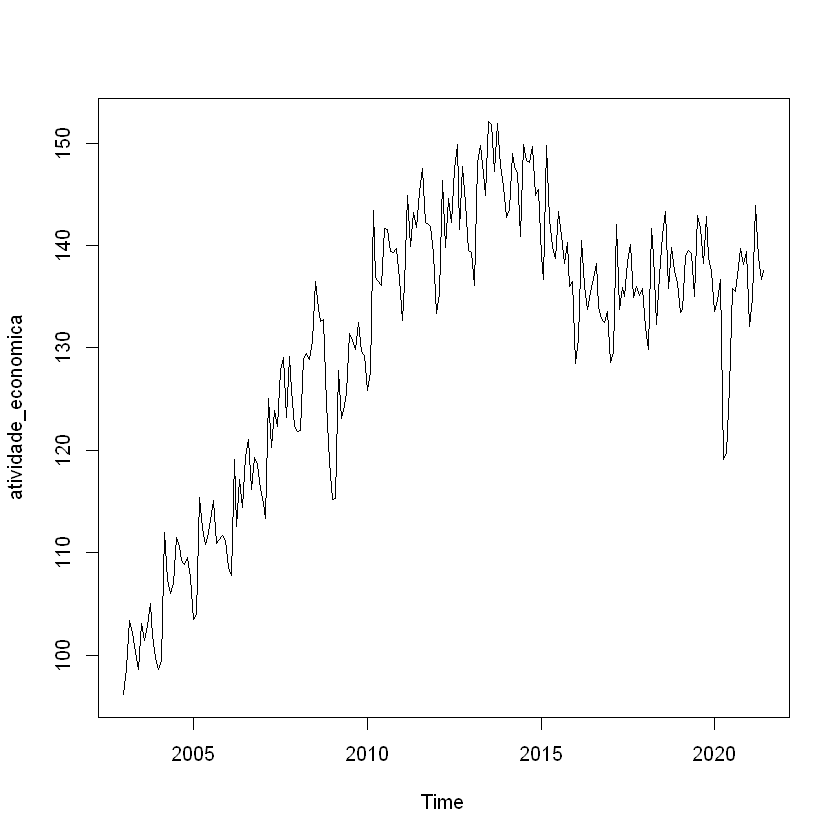

In [61]:
plot(atividade_economica)

## Google Trends
---
* Com o uso do pacote gtrendsR podemos obter o indicador de pesquisas do Google (Trends). Escolhemos o termo "seguro desemprego" por representar um bom indicativo da tendência do desemprego. A utilização desse tipo de dado vem crescendo na área da previsão macroeconômica, como mostram alguns exemplos, como @naccarato2018combining e @castelnuovo2017google.

### seguro_desemprego

In [62]:
seguro_desemprego = gtrends(keyword = c("seguro desemprego"),
                geo = "BR", time='all', onlyInterest = TRUE)

seguro_desemprego = seguro_desemprego$interest_over_time %>%
   select(date, hits)

seguro_desemprego = head(seguro_desemprego, nrow(seguro_desemprego) -1)
seguro_desemprego = as.ts(read.zoo(seguro_desemprego, FUN=as.yearmon))

In [126]:
seguro_desemprego

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,6,11,12,15,14,8,11,13,12,12,11,11
2005,13,18,10,10,11,10,12,9,13,11,14,11
2006,14,13,12,15,16,14,20,15,15,14,15,12
2007,16,18,18,14,16,17,22,19,14,14,13,13
2008,22,22,22,21,22,22,20,20,20,21,20,22
2009,32,46,36,32,37,35,32,25,26,26,23,27
2010,35,33,34,31,31,27,30,26,24,24,25,23
2011,29,28,31,29,28,30,26,28,33,29,27,27
2012,37,31,29,28,26,24,27,23,24,23,23,21
2013,33,25,26,28,25,23,24,24,23,26,23,21


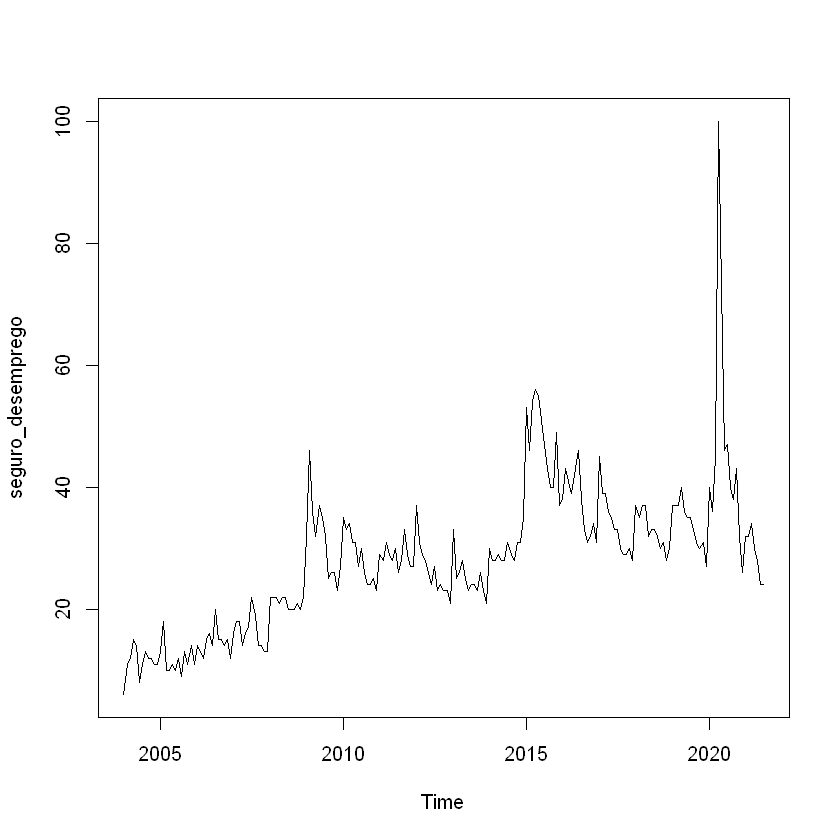

In [64]:
plot(seguro_desemprego)

## Financial Data Directly: Quandl
---
* Do Quandl extrairemos apenas o Índice de mercados emergentes e o crescimento do PIB trimestral, que é a variável de interesse.


### mercados_emergentes

In [65]:
mercados_emergentes = Quandl("NASDAQOMX/NQEM")
mercados_emergentes$monthyear = paste0(year(mercados_emergentes$`Trade Date`), "-",
                                  month(mercados_emergentes$`Trade Date`))


In [66]:
mercados_emergentes = mercados_emergentes %>%
    group_by(monthyear)%>%
    summarise(numMean = mean(`Index Value`)) %>%
    as.data.frame()

In [112]:
mercados_emergentes  = as.ts(read.zoo(mercados_emergentes, FUN = as.yearmon))

In [127]:
mercados_emergentes

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2001,,,305.2900,298.3515,311.0868,304.8705,279.6581,278.0278,243.0980,239.1322,265.5171,292.3525
2002,308.7976,313.4421,332.3770,342.7023,335.2745,317.9400,304.0500,285.1127,271.9250,257.4152,275.3530,279.2714
2003,281.4814,270.7879,260.2790,267.5729,279.4486,303.9286,323.7436,336.6981,356.1762,377.5661,383.2179,396.9145
2004,429.4830,438.2768,446.6952,453.4448,399.6780,396.3857,397.0662,395.8864,423.4729,439.0595,461.8514,481.4041
2005,486.6950,513.6411,519.7409,496.6719,496.9081,515.4605,536.2715,563.1287,587.8790,577.4352,597.2467,641.7290
2006,702.9600,722.6084,724.3817,775.4132,776.6386,677.9932,706.1020,734.0613,740.7610,764.9032,813.1714,858.6740
2007,870.5580,894.0758,863.9005,932.2160,966.2764,1009.5033,1093.2581,1018.2987,1099.1900,1232.1552,1213.3671,1206.8965
2008,1125.4867,1092.1815,1053.6870,1114.8659,1154.3600,1077.5329,984.6986,934.9367,803.6867,572.0830,508.7142,526.6945
2009,519.9815,503.6463,511.3073,605.4586,700.7100,748.6118,766.7964,823.9257,870.7629,923.6532,934.7405,949.4859
2010,967.3337,908.2200,966.0087,1012.2533,923.4965,921.6827,951.3381,985.5636,1032.9719,1106.2095,1119.9852,1121.1818


### PIB

In [68]:
pib = Quandl("OECD/KEI_NAEXKP01_BRA_GP_Q")
pib = as.ts(read.zoo(pib, FUN = as.yearmon))

In [69]:
pib

,Qtr1,Qtr2,Qtr3,Qtr4
1996,,,1.118981496,3.736639832
1997,-0.962936239,1.036087543,0.569027295,1.237298244
1998,0.831458721,-1.954228682,1.666010893,0.001616551
1999,-1.153702746,0.199876492,0.497693234,0.015698970
2000,1.412850944,1.069925916,1.391515867,1.191506360
2001,1.221138417,0.374568957,-0.496897984,-0.513288612
2002,-0.293197037,2.422463369,0.361994579,1.322145817
2003,1.011128443,-0.422176014,-0.845005235,0.922049021
2004,1.039019743,1.405949959,2.762946163,1.233674038
2005,0.770439615,0.844703765,1.191853893,-0.681597194


In [72]:
pib = qtr2month(pib)
pib

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,,,,,,,,,1.118981496,NA,NA,3.736639832
1997,NA,NA,-0.962936239,NA,NA,1.036087543,NA,NA,0.569027295,NA,NA,1.237298244
1998,NA,NA,0.831458721,NA,NA,-1.954228682,NA,NA,1.666010893,NA,NA,0.001616551
1999,NA,NA,-1.153702746,NA,NA,0.199876492,NA,NA,0.497693234,NA,NA,0.015698970
2000,NA,NA,1.412850944,NA,NA,1.069925916,NA,NA,1.391515867,NA,NA,1.191506360
2001,NA,NA,1.221138417,NA,NA,0.374568957,NA,NA,-0.496897984,NA,NA,-0.513288612
2002,NA,NA,-0.293197037,NA,NA,2.422463369,NA,NA,0.361994579,NA,NA,1.322145817
2003,NA,NA,1.011128443,NA,NA,-0.422176014,NA,NA,-0.845005235,NA,NA,0.922049021
2004,NA,NA,1.039019743,NA,NA,1.405949959,NA,NA,2.762946163,NA,NA,1.233674038
2005,NA,NA,0.770439615,NA,NA,0.844703765,NA,NA,1.191853893,NA,NA,-0.681597194


## Banco Central
* Do banco central:  Índice de Condições Econômicas Atuais - Fecomercio; Índice de Valores de Garantia de Imóveis Residenciais Financiados; Vendas de veículos pelas concessionárias;;Indicador de Movimento do Comércio a Prazo; Índice volume de vendas no varejo.

### bets

In [128]:
bets = rbcb::get_series(c(economic_conditions = 4394,
                         house_index = 21340,
                         sales_vehicles = 1378,
                         sales_credit = 1453,
                         sales_retail = 1455), as='ts') %>%
    Reduce(ts.intersect, .)

In [129]:
colnames(bets) = c('economic_conditions', 'house_index', 'sales_vehicle', 'sales_credit', 'sales_retail')

In [130]:
tail(bets)

,economic_conditions,house_index,sales_vehicle,sales_credit,sales_retail
"[239,]",74.11,609.18,180904,1590748,93.6
"[240,]",72.97,614.48,186718,1671876,86.1
"[241,]",69.89,619.78,208801,1184022,91.3
"[242,]",64.27,625.08,191853,1068941,91.7
"[243,]",62.93,630.37,206221,1180032,99.6
"[244,]",63.11,635.65,191571,1565734,95.8


## SIDRA
---
* Do sidra selecionamos: Produção Física Industrial, Produção industrial de indústrias manufatureiras; Produção Física Industrial dos insumos típicos da construção civil; Produção de Soja e Milho; Índice de preços da construção civíl; Volume de serviços - PMS; IPCA - dessazonalizado.


### ind_prod

In [169]:
ind_prod = get_sidra(3653, variable = 4139, 
                     classific = 'c544', 
                     category=list(129314), 
                     period='all') %>%
    select("Mês (Código)", Valor) %>%
    separate("Mês (Código)", into = c('pre', 'post'), sep=-2) %>%
    mutate(date = paste0(pre, '-', post)) %>%
    select(-pre, -post)
    

In [170]:
ind_prod = as.ts(read.zoo(ind_prod[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
ind_prod

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2002,0.0,3.2,-0.5,-0.3,-0.5,0.3,0.5,-1.5,1.3,0.8,0.1,-1.0
2003,0.4,-0.1,0.1,-0.4,-2.1,0.5,-1.0,1.6,3.3,0.5,1.2,-1.6
2004,1.7,1.6,0.6,0.7,0.9,0.2,0.7,1.0,0.7,-0.7,-0.2,1.1
2005,0.3,-1.5,0.9,0.1,3.4,-2.0,-0.7,0.2,-1.0,-0.7,1.1,2.0
2006,0.4,0.7,-0.7,0.7,0.9,-1.7,1.1,-0.2,-1.2,0.6,1.4,1.3
2007,-0.6,1.3,1.1,1.2,0.3,0.7,-0.5,1.6,-1.0,2.7,-1.1,0.4
2008,1.7,-0.4,0.3,-0.1,0.7,1.8,0.3,-1.3,1.4,-2.9,-5.9,-11.2
2009,2.1,2.3,0.5,1.2,1.3,1.3,1.3,1.4,1.6,2.0,1.6,0.1
2010,1.6,-0.2,2.5,0.1,-0.1,-0.6,-0.6,-0.4,0.2,-0.3,0.8,0.6
2011,0.1,1.4,0.6,-2.6,2.9,-2.2,0.3,-0.9,-2.1,-0.9,0.8,2.4


### manufaturados

In [74]:
manufaturados = get_sidra(3651, variable = 4139, classific = "c543", category =  list(129300), period = "all") %>% #9
  select('Mês (Código)', Valor) %>%
  separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
  mutate(date = paste0(pre, "-", post)) %>% 
  select(-pre,-post)

manufaturados = as.ts(read.zoo(manufaturados[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))

In [131]:
manufaturados

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2002,0.0,4.3,-0.9,-0.3,-0.9,-1.0,2.1,-0.9,-0.6,3.2,-2.3,-1.5
2003,-0.8,-0.9,-0.3,-0.5,-0.9,0.5,-0.7,1.1,2.0,2.2,1.2,-2.0
2004,1.4,0.1,1.3,0.4,0.6,1.2,-0.1,1.6,1.6,-1.0,1.2,2.4
2005,1.5,-1.4,0.5,0.2,3.2,-2.3,0.8,-0.5,-3.9,0.5,2.8,4.4
2006,-0.8,3.2,-2.8,0.6,-0.7,-0.7,0.4,-0.8,-0.3,1.0,1.3,1.3
2007,-1.2,1.5,-0.1,1.5,0.0,2.5,-1.7,1.1,0.6,0.2,0.5,-0.2
2008,3.1,-5.5,3.6,-0.5,1.1,1.2,-1.2,0.0,2.0,-3.2,-4.5,-9.3
2009,2.7,2.8,1.8,1.5,1.7,-0.2,2.2,0.7,0.2,1.5,1.5,-0.6
2010,1.4,0.9,0.8,-0.1,-0.9,0.0,-1.1,-0.3,1.6,0.4,-0.8,1.6
2011,0.1,0.4,2.3,-4.9,2.6,-2.2,2.7,-3.4,-2.8,0.7,0.4,3.4


### constr_civil

In [75]:
constr_civil = get_sidra(3652, period = "all", variable = 3147) %>% #31
  select('Mês (Código)', Valor) %>%
  separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
  mutate(date = paste0(pre, "-", post)) %>% 
  select(-pre,-post)

constr_civil = as.ts(read.zoo(constr_civil[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))

Considering all categories once 'classific' was set to 'all' (default)



In [132]:
constr_civil

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2012,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2013,2.1,-5.3,-2.2,9.5,0.2,2.7,3.5,0.9,3.5,1.5,1.2,-4.5
2014,-3.4,5.1,-3.8,-9.6,-5.1,-11.8,-7.3,-7.4,-3.6,-5.7,-7.7,-6.3
2015,-8.3,-11.5,-3.3,-9.2,-13.3,-7.4,-11.5,-14.2,-17.7,-16.5,-16.8,-20.4
2016,-19.5,-13.5,-16.6,-12.0,-9.4,-7.2,-10.5,-6.9,-10.6,-14.8,-10.0,-6.1
2017,-3.5,-8.4,-2.8,-13.0,-5.9,-6.9,-5.7,-2.7,-0.6,2.0,4.5,8.0
2018,3.9,1.8,-2.9,9.0,-8.0,4.0,2.9,1.5,1.3,5.1,-1.4,-3.6
2019,1.1,5.0,-3.9,0.4,14.3,-3.6,2.9,-0.1,1.8,0.1,1.5,-0.5
2020,-0.4,-1.3,-4.7,-33.9,-20.9,-3.3,4.4,3.7,10.6,10.3,11.8,21.5
2021,12.7,11.5,22.9,66.5,34.2,17.3,,,,,,


### agro

In [85]:
agro = get_sidra(6588, variable = 35, classific = "c48", category = list(c(39441,39442,39443)), period = "all") %>% #8
  select('Mês (Código)', Valor) %>%
  separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
  mutate(date = paste0(pre, "-", post)) %>% 
  select(-pre,-post) %>%
  group_by(date) %>%
  mutate(Valor = sum(Valor)) %>%
  ungroup() %>%
  distinct()

In [87]:
agro = as.ts(read.zoo(agro[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))

In [133]:
agro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2006,,,,,,,,,94454748,94479700,94295581,94710554
2007,104091821,105874718,107176778,108606652,111406406,110014029,109932159,110442628,109954756,109830508,109787018,109718862
2008,112025288,115211898,116110429,117218616,118121427,117165988,118523237,118572894,118487663,118660789,118618713,118661027
2009,108608839,108882338,110064918,108846797,108090043,106627295,107477717,106922067,107987062,108159601,108063194,108078302
2010,117558734,119297500,119932557,121201736,121278318,121510832,121773922,123471571,124289120,124110356,124162180,124539605
2011,119706280,124181502,127873888,130586955,132529175,132721990,130298697,130544462,131050928,131236841,131073752,130929045
2012,132586973,131119305,132612152,133666279,134180635,134788384,137273136,138724635,137698851,137134504,137195248,137196412
2013,157157187,157700559,155810202,158803278,159571970,159545113,161314084,162067846,162083181,161881607,161790080,162246826
2014,166996228,163387884,160451563,161638598,162631830,162847308,163594698,164184569,164232830,164671146,165345742,165199037
2015,172005563,170328406,170662707,171867340,175258055,176764719,179934448,181064728,181890875,182668182,182630055,182751501


### preco_civil

In [89]:
preco_civil = get_sidra(2296, period = "all", variable = 1198) %>% #31
  select('Mês (Código)', Valor) %>%
  separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
  mutate(date = paste0(pre, "-", post)) %>% 
  select(-pre,-post)

preco_civil = as.ts(read.zoo(preco_civil[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))

Considering all categories once 'classific' was set to 'all' (default)



In [134]:
preco_civil

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,,,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1987,NA,105.19,165.05,188.30,242.41,NA,NA,NA,NA,NA,NA,NA
1988,NA,143.62,193.02,241.00,305.25,331.57,400.18,508.80,610.92,741.46,875.15,1008.67
1989,1218.52,1087.11,935.14,879.65,850.69,1025.00,1170.51,1486.67,1637.09,1781.20,1934.12,2249.28
1990,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,951.74
1991,684.28,454.68,232.86,206.57,239.35,267.40,280.80,289.39,325.00,380.35,449.23,511.24
1992,547.65,609.46,724.01,831.54,926.99,1024.53,1093.86,1113.73,1237.32,1195.43,1165.46,1128.91
1993,1264.30,1211.21,1207.63,1296.37,1382.57,1485.16,1612.17,1711.31,1768.91,1989.10,2234.04,2449.47
1994,2616.30,2907.67,3534.19,4056.96,4548.60,4998.33,NA,NA,NA,NA,NA,NA
1995,NA,NA,NA,NA,NA,21.69,20.50,22.18,23.96,24.14,23.52,22.09


### servicos

In [137]:
servicos = get_sidra(6443, period = "all", variable = 8676, classific = c("c11046", "c12355"), category = list(33534, 107071)) %>%
  select('Mês (Código)', Valor) %>%
  separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
  mutate(date = paste0(pre, "-", post)) %>% 
  select(-pre,-post)

servicos = as.ts(read.zoo(servicos[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))


In [138]:
servicos

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,NA,1.1,0.4,1.3,1.2,0.9,1.1,0.5,0.5,0.2,1.0,0.5
2012,1.3,1.4,0.7,0.0,1.3,0.0,1.0,1.6,-0.3,0.6,0.7,1.9
2013,-0.3,0.7,-0.1,2.0,0.2,1.4,-0.1,0.7,1.1,0.6,0.9,0.2
2014,1.0,-0.4,0.5,0.3,0.5,0.1,-1.0,0.9,1.5,0.7,0.4,-1.2
2015,0.2,-0.3,1.2,-0.5,-0.5,-0.5,0.1,0.4,-0.3,1.2,-1.1,0.1
2016,0.5,0.8,-0.4,-0.7,-0.4,0.0,0.9,-0.2,-0.6,-1.2,-0.1,0.0
2017,3.6,0.4,-1.3,0.2,0.5,1.6,-0.3,-0.8,0.2,-0.1,1.0,0.4
2018,-1.1,0.2,1.7,0.6,-5.3,7.0,-0.6,1.2,-0.4,-0.8,0.6,1.3
2019,0.3,-0.8,0.0,0.8,0.3,-0.4,2.2,0.0,1.1,0.8,-0.5,-0.3
2020,0.9,-0.4,-6.9,-12.8,-2.1,4.9,3.0,3.9,2.5,2.5,2.2,0.9


### inflacao

In [92]:
inflacao = get_sidra(118, period = "all") %>% #9
  select('Mês (Código)', Valor) %>%
  separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
  mutate(date = paste0(pre, "-", post)) %>% 
  select(-pre,-post)

inflacao = as.ts(read.zoo(inflacao[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))

Considering all categories once 'classific' was set to 'all' (default)



In [139]:
inflacao

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1998,0.59,0.44,0.28,0.17,0.48,0.04,-0.04,-0.38,-0.16,0.05,-0.10,0.33
1999,0.58,1.03,1.05,0.51,0.30,0.22,1.18,0.65,0.36,1.21,0.96,0.58
2000,0.53,0.11,0.19,0.40,0.06,0.31,1.68,1.36,0.28,0.16,0.33,0.56
2001,0.48,0.43,0.35,0.56,0.44,0.59,1.39,0.74,0.29,0.82,0.70,0.65
2002,0.45,0.35,0.60,0.76,0.25,0.47,1.24,0.66,0.74,1.28,3.02,2.11
2003,2.20,1.55,1.22,0.94,0.65,-0.09,0.25,0.34,0.79,0.28,0.30,0.50
2004,0.74,0.58,0.44,0.35,0.52,0.75,0.93,0.72,0.35,0.43,0.67,0.83
2005,0.52,0.55,0.60,0.86,0.49,0.05,0.28,0.18,0.37,0.75,0.54,0.36
2006,0.59,0.36,0.41,0.20,0.09,-0.18,0.23,0.07,0.23,0.37,0.28,0.45
2007,0.47,0.38,0.35,0.21,0.28,0.34,0.27,0.52,0.20,0.30,0.35,0.71


### FEED
* Do FRED: Taxa de câmbio efetiva real, Taxa de juros interbancária, Índice de atividade econômica dos Estados Unidos e o survey da OCDE com os seguintes indicadores: Índice de confiança da manufatura,  Índice de confiança de exportadores,  Índice de tendência de emprego, Índice de confiança do consumidor e Capacidade instalada.


### taxa_cambio

In [95]:
taxa_cambio = fredr_series_observations(series_id = "RBBRBIS") 
taxa_cambio = as.ts(read.zoo(taxa_cambio[,c(1,3)], FUN = as.yearmon))

In [140]:
taxa_cambio

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,82.46,81.36,81.89,81.35,81.20,82.07,77.41,81.26,84.93,88.29,91.45,93.03
1995,94.57,95.21,89.39,87.81,91.18,91.16,91.71,92.90,93.35,93.15,94.53,95.87
1996,96.62,96.77,96.43,97.31,98.17,98.75,98.86,97.96,97.77,97.67,96.99,97.49
1997,98.89,100.09,100.27,100.85,99.94,99.75,100.33,100.77,99.68,98.98,98.88,101.13
1998,102.76,101.57,101.09,100.18,99.90,100.20,99.53,98.52,95.84,93.08,93.07,91.99
1999,73.79,59.20,61.10,68.68,69.75,67.08,66.49,63.15,62.72,60.76,63.07,66.63
2000,68.23,69.44,71.47,71.17,70.03,69.65,71.37,72.74,72.28,71.31,69.14,68.05
2001,68.03,66.90,64.82,62.35,60.02,58.50,57.40,55.91,52.47,51.76,56.33,61.15
2002,61.36,63.92,66.67,67.83,63.20,57.53,53.12,50.21,47.38,42.03,45.33,45.29
2003,47.85,46.13,48.05,53.21,55.26,56.40,57.14,55.39,56.81,57.02,56.21,55.31


### atividade_usa

In [96]:
atividade_usa = fredr_series_observations(series_id = "USPHCI") #23
atividade_usa = as.ts(read.zoo(atividade_usa[,c(1,3)], FUN = as.yearmon))

In [141]:
atividade_usa

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1979,45.15,45.29,45.53,45.61,45.83,45.96,46.08,46.14,46.24,46.33,46.45,46.50
1980,46.55,46.65,46.72,46.63,46.49,46.40,46.31,46.40,46.50,46.62,46.75,46.94
1981,46.99,47.14,47.22,47.35,47.36,47.49,47.63,47.64,47.66,47.62,47.56,47.49
1982,47.42,47.39,47.37,47.27,47.28,47.21,47.11,47.11,47.02,46.92,46.84,46.89
1983,47.04,47.07,47.20,47.36,47.53,47.71,48.05,48.03,48.48,48.74,49.01,49.28
1984,49.56,49.86,50.08,50.33,50.61,50.88,51.03,51.24,51.49,51.66,51.92,52.04
1985,52.24,52.40,52.61,52.76,52.96,53.07,53.24,53.45,53.61,53.77,53.95,54.10
1986,54.31,54.33,54.47,54.64,54.75,54.84,55.06,55.20,55.39,55.55,55.72,55.96
1987,56.10,56.28,56.46,56.74,56.90,57.10,57.32,57.51,57.71,57.94,58.18,58.41
1988,58.57,58.82,59.04,59.31,59.46,59.74,59.93,60.05,60.31,60.51,60.76,60.96


### juros

In [97]:
juros = fredr_series_observations(series_id = "IRSTCI01BRM156N") 
juros = as.ts(read.zoo(juros[,c(1,3)], FUN = as.yearmon))

In [142]:
juros

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,,,,,,,,,,25.78,25.34,25.34
1997,25.05,24.46,23.87,23.58,23.58,23.58,23.58,23.58,23.58,24.50,46.44,45.09
1998,42.90,42.00,38.54,36.55,33.30,29.41,27.80,25.75,42.34,49.75,44.88,39.41
1999,38.25,41.00,46.00,32.00,23.50,21.00,19.50,19.50,19.00,19.00,19.00,19.00
2000,19.00,19.00,18.50,18.50,18.50,17.50,16.50,16.50,16.50,16.50,16.50,15.75
2001,15.25,15.25,15.75,16.25,16.75,18.25,19.00,19.00,19.00,19.00,19.00,19.00
2002,19.00,18.75,18.50,18.50,18.50,18.50,18.00,18.00,18.00,21.00,22.00,25.00
2003,25.50,26.50,26.50,26.50,26.50,26.00,24.50,22.00,20.00,19.00,17.50,16.50
2004,16.50,16.50,16.25,16.00,16.00,16.00,16.00,16.00,16.25,16.75,17.25,17.75
2005,18.25,18.75,19.25,19.50,19.75,19.75,19.75,19.75,19.50,19.00,18.50,18.00


### negocios

In [100]:
negocios = fredr_series_observations(series_id = "BSCICP03BRM665S") 
negocios = as.ts(read.zoo(negocios[,c(1,3)], FUN = as.yearmon))

In [143]:
negocios

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,,,,101.64573,100.06390,98.58620,97.44495,97.08812,97.02576,97.10817,97.37043,97.71556
1996,98.03745,98.29452,98.53956,98.83017,99.18474,99.55983,99.86408,99.98513,100.02142,100.04382,100.14316,100.27377
1997,100.37192,100.40946,100.39615,100.32543,100.15414,99.95708,99.79672,99.70256,99.59697,99.33908,98.79691,98.15548
1998,97.67176,97.62927,97.81690,98.05707,98.21912,98.24718,98.06505,97.54822,96.85670,96.28182,96.31809,96.52948
1999,96.73592,96.90247,97.10031,97.42399,97.99458,98.65270,99.24227,99.60555,99.83115,99.97446,100.01633,100.02123
2000,100.06189,100.21444,100.45068,100.75359,101.13231,101.50350,101.73137,101.65847,101.44734,101.25143,101.17493,101.21746
2001,101.33384,101.30776,101.05417,100.69562,100.17935,99.48506,98.73921,98.15554,97.90991,98.17126,98.99539,99.87946
2002,100.37831,100.54369,100.45888,100.29105,99.95735,99.51048,99.13737,99.07008,99.32239,99.82408,100.45339,100.90381
2003,100.92580,100.61338,100.08057,99.50592,98.87797,98.28518,98.02463,98.42430,99.28286,100.25726,101.04271,101.50372
2004,101.60896,101.55649,101.48424,101.57278,101.79930,102.01655,102.17858,102.27427,102.39976,102.51204,102.48770,102.26189


### ind_export

In [102]:
ind_export = fredr_series_observations(series_id = "BSXRLV02BRM086S")
ind_export = as.ts(read.zoo(ind_export[,c(1,3)], FUN = as.yearmon))

In [144]:
ind_export

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,3.6,2.3,0.0,1.5,-3.9,-5.6,-9.8,-9.7,-11.1,-10.2,-10.7,-10.4
1981,-9.4,-11.7,-14.0,-32.5,-18.9,-20.6,-21.8,-21.7,-21.1,-19.2,-21.7,-22.4
1982,-21.3,-22.7,-25.0,-26.5,-27.9,-29.6,-31.9,-34.7,-39.1,-44.2,-40.7,-38.4
1983,-40.3,-31.7,-26.0,-17.5,-18.9,-16.6,-13.8,-14.7,-12.1,-11.3,-10.7,-11.4
1984,-11.2,-8.7,-7.0,-4.5,-6.9,-6.6,-1.8,-5.7,-5.1,-8.3,-7.7,-10.4
1985,-15.2,-15.7,-17.0,-21.5,-15.9,-12.6,-6.9,-7.7,-8.1,-6.3,-5.7,-4.4
1986,-4.2,-3.7,-4.9,-8.5,-3.9,-2.6,0.2,0.3,-0.1,4.6,0.3,-1.4
1987,-3.2,-2.7,-2.9,-7.5,-3.9,-1.6,1.2,-1.7,-1.1,-2.4,-0.7,-0.4
1988,-0.1,1.2,2.1,5.5,2.1,1.4,0.2,0.2,-0.1,-0.4,-1.7,-2.4
1989,-4.1,-3.8,-3.9,-1.6,-6.9,-9.6,-11.7,-14.8,-17.0,-21.5,-21.7,-25.4


### ind_trabalho

In [103]:
ind_trabalho = fredr_series_observations(series_id = "BRABREMFT02STSAM") 
ind_trabalho = as.ts(read.zoo(ind_trabalho[,c(1,3)], FUN = as.yearmon))

In [145]:
ind_trabalho

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,,,24.7,25.4,23.1,28.6,26.6,25.2,17.6,22.8,22.3,22.3
2011,20.9,19.0,17.5,23.2,19.5,24.8,22.8,23.9,26.6,22.6,15.2,21.3
2012,19.4,19.4,23.5,23.7,23.3,16.2,18.4,20.4,20.5,20.5,13.4,13.2
2013,15.7,21.3,20.7,16.4,13.0,19.8,13.4,12.1,15.1,15.0,15.4,10.8
2014,10.2,12.7,13.2,12.7,5.2,4.4,10.7,3.1,8.0,6.1,10.2,4.7
2015,-1.8,-1.4,-9.1,-11.3,-6.4,-11.9,-14.8,-14.9,-13.5,-17.4,-16.4,-17.8
2016,-15.6,-17.9,-17.0,-20.0,-12.8,-11.2,-10.9,-4.1,-6.8,-6.5,-6.1,-11.5
2017,-6.4,-4.8,-4.2,2.0,0.5,-1.4,-1.7,-3.1,-2.2,1.3,0.4,3.5
2018,4.4,2.7,6.9,7.5,6.9,4.1,4.5,3.9,2.5,3.0,9.1,13.3
2019,11.7,7.0,6.4,2.9,5.2,4.7,7.6,8.2,4.9,4.9,5.7,9.8


### ind_consumo

In [104]:
ind_consumo = fredr_series_observations(series_id = "CSCICP03BRM665S") 
ind_consumo = as.ts(read.zoo(ind_consumo[,c(1,3)], FUN = as.yearmon))

In [146]:
ind_consumo 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1994,,,,,,97.47007,98.36701,99.14502,99.62341,99.93977,100.18011,100.34416
1995,100.38915,100.20440,99.77325,99.31997,98.99741,98.74669,98.54855,98.44283,98.41182,98.41559,98.45516,98.56144
1996,98.75045,98.96046,99.12230,99.14983,99.09036,99.06172,99.07882,99.13625,99.21479,99.34114,99.47622,99.58521
1997,99.67625,99.73126,99.77526,99.70471,99.47994,99.27593,99.13761,98.93235,98.66142,98.46621,98.36595,98.31852
1998,98.40271,98.52399,98.40570,98.12419,98.02576,98.29034,98.78320,99.25271,99.50600,99.44809,99.05424,98.49362
1999,98.04143,97.56467,97.09043,96.95967,97.22701,97.80179,98.28913,98.48942,98.48526,98.37018,98.31748,98.43030
2000,98.66926,98.79663,98.61249,98.31305,98.12701,98.15001,98.19096,98.13504,98.18701,98.38981,98.63501,98.95057
2001,99.32038,99.47812,99.33265,98.97089,98.43124,97.81381,97.60727,97.57136,97.52985,97.34469,97.28651,97.45771
2002,97.67399,97.89482,98.06487,98.16682,98.09951,97.93095,97.97696,98.08234,98.28560,98.41051,98.57476,98.73939
2003,98.82947,98.88938,98.99658,99.24417,99.50976,99.64395,99.53554,99.33789,99.17379,99.17483,99.42179,99.81587


### capac_instalada

In [105]:
capac_instalada = fredr_series_observations(series_id = "BSCURT02BRM160S") 

capac_instalada = as.ts(read.zoo(capac_instalada[,c(1,3)], FUN = as.yearmon))

In [147]:
capac_instalada 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1980,85.0,84.8,84.7,84.5,84.7,84.9,85.0,84.5,84.1,83.5,83.3,83.2
1981,83.0,81.5,80.0,78.5,77.7,76.9,76.1,75.2,74.4,73.5,74.0,74.5
1982,75.0,75.5,76.0,76.5,76.7,76.9,77.1,76.5,76.0,75.5,75.1,74.5
1983,74.1,74.2,74.3,74.4,73.7,72.9,72.1,72.2,72.4,72.5,72.7,72.9
1984,73.1,73.5,74.0,74.4,74.3,74.3,74.1,74.6,75.0,75.4,76.3,77.2
1985,78.1,77.9,77.7,77.4,77.3,77.3,77.1,77.9,78.6,79.4,80.3,81.2
1986,82.1,81.9,81.7,81.4,81.6,81.9,82.1,83.2,84.3,85.3,85.3,85.3
1987,85.2,84.6,84.0,83.4,82.7,82.0,76.1,80.7,80.0,79.3,79.6,80.0
1988,80.3,80.4,80.4,80.4,79.9,79.5,79.1,79.2,79.2,79.2,79.3,79.4
1989,79.4,79.4,79.4,79.4,80.6,81.8,83.0,82.8,82.5,82.2,81.6,81.1


In [ ]:
download_data = function() {
    rendimento = ipeadata("PNADC12_RRTH12") %>%
    select(date, value)
    rendimento = as.ts(read.zoo(rendimento[,c(1,2)], FUN=as.yearmon))
    forca_trabalho = ipeadata("PNADC12_FT12") %>%
    select(date, value)
    forca_trabalho  = as.ts(read.zoo(forca_trabalho[,c(1,2)], FUN = as.yearmon))
    desemprego = ipeadata("PNADC12_TDESOC12") %>% select(date, value ) 
    desemprego  = as.ts(read.zoo(desemprego[,c(1,2)], FUN = as.yearmon))
    caged = ipeadata("CAGED12_SALDON12") %>%
        select(date, value)
    caged_2 = ipeadata("CAGED12_SALDO12") %>%
        select(date, value)
    caged = rbind(caged, caged_2)
    caged  = as.ts(read.zoo(caged [,c(1,2)], FUN = as.yearmon))
    bovespa = ipeadata("ANBIMA12_IBVSP12") %>% select(date, value )
    bovespa = as.ts(read.zoo(bovespa[,c(1,2)], FUN = as.yearmon))
    taxa_juros  = ipeadata("ANBIMA12_TJTLN1212") %>% select(date, value ) 
    taxa_juros  = as.ts(read.zoo(taxa_juros[,c(1,2)], FUN = as.yearmon))
    exportacoes  = ipeadata("PAN12_XTV12") %>% select(date, value ) 
    exportacoes  = as.ts(read.zoo(exportacoes[,c(1,2)], FUN = as.yearmon))
    importacoes  = ipeadata("PAN12_MTV12") %>% select(date, value ) 
    importacoes  = as.ts(read.zoo(importacoes[,c(1,2)], FUN = as.yearmon))
    moeda = ipeadata("BM12_M1MN12") %>% select(date, value ) 
    moeda = as.ts(read.zoo(moeda[,c(1,2)], FUN = as.yearmon))
    dolar = ipeadata("PAN12_ERV12") %>% select(date, value ) 
    dolar = as.ts(read.zoo(dolar[,c(1,2)], FUN = as.yearmon))
    atividade_economica  = ipeadata("SGS12_IBCBR12") %>% select(date, value ) 
    atividade_economica  = as.ts(read.zoo(atividade_economica[,c(1,2)], FUN = as.yearmon))
    seguro_desemprego = gtrends(keyword = c("seguro desemprego"),
                geo = "BR", time='all', onlyInterest = TRUE)
    seguro_desemprego = seguro_desemprego$interest_over_time %>%
       select(date, hits)
    seguro_desemprego = head(seguro_desemprego, nrow(seguro_desemprego) -1)
    seguro_desemprego = as.ts(read.zoo(seguro_desemprego, FUN=as.yearmon))
    mercados_emergentes = Quandl("NASDAQOMX/NQEM")
    mercados_emergentes$monthyear = paste0(year(mercados_emergentes$`Trade Date`), "-",
                                  month(mercados_emergentes$`Trade Date`))
    mercados_emergentes = mercados_emergentes %>%
        group_by(monthyear)%>%
        summarise(numMean = mean(`Index Value`)) %>%
        as.data.frame()
    mercados_emergentes  = as.ts(read.zoo(mercados_emergentes, FUN = as.yearmon))
    pib = Quandl("OECD/KEI_NAEXKP01_BRA_GP_Q")
    pib = as.ts(read.zoo(pib, FUN = as.yearmon))
    pib = qtr2month(pib)
    bets = rbcb::get_series(c(economic_conditions = 4394,
                         house_index = 21340,
                         sales_vehicles = 1378,
                         sales_credit = 1453,
                         sales_retail = 1455), as='ts') %>%
        Reduce(ts.intersect, .)
    colnames(bets) = c('economic_conditions', 'house_index', 'sales_vehicle', 'sales_credit', 'sales_retail')
    ind_prod = get_sidra(3653, variable = 4139, 
                     classific = 'c544', 
                     category=list(129314), 
                     period='all') %>%
        select("Mês (Código)", Valor) %>%
        separate("Mês (Código)", into = c('pre', 'post'), sep=-2) %>%
        mutate(date = paste0(pre, '-', post)) %>%
        select(-pre, -post)
    ind_prod = as.ts(read.zoo(ind_prod[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    manufaturados = get_sidra(3651, variable = 4139, classific = "c543", category =  list(129300), period = "all") %>% #9
      select('Mês (Código)', Valor) %>%
      separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
      mutate(date = paste0(pre, "-", post)) %>% 
      select(-pre,-post)
    manufaturados = as.ts(read.zoo(manufaturados[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    constr_civil = get_sidra(3652, period = "all", variable = 3147) %>% #31
      select('Mês (Código)', Valor) %>%
      separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
      mutate(date = paste0(pre, "-", post)) %>% 
      select(-pre,-post)
    constr_civil = as.ts(read.zoo(constr_civil[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    agro = get_sidra(6588, variable = 35, classific = "c48", category = list(c(39441,39442,39443)), period = "all") %>% #8
      select('Mês (Código)', Valor) %>%
      separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
      mutate(date = paste0(pre, "-", post)) %>% 
      select(-pre,-post) %>%
      group_by(date) %>%
      mutate(Valor = sum(Valor)) %>%
      ungroup() %>%
      distinct()
    agro = as.ts(read.zoo(agro[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    preco_civil = get_sidra(2296, period = "all", variable = 1198) %>% #31
      select('Mês (Código)', Valor) %>%
      separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
      mutate(date = paste0(pre, "-", post)) %>% 
      select(-pre,-post)
    preco_civil = as.ts(read.zoo(preco_civil[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    servicos = get_sidra(6443, period = "all", variable = 8676, classific = c("c11046", "c12355"), category = list(33534, 107071)) %>%
      select('Mês (Código)', Valor) %>%
      separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
      mutate(date = paste0(pre, "-", post)) %>% 
      select(-pre,-post)
    servicos = as.ts(read.zoo(servicos[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    inflacao = get_sidra(118, period = "all") %>% #9
      select('Mês (Código)', Valor) %>%
      separate('Mês (Código)', into = c("pre", "post"), sep = -2) %>% 
      mutate(date = paste0(pre, "-", post)) %>% 
      select(-pre,-post)
    inflacao = as.ts(read.zoo(inflacao[,c(2,1)], FUN = as.yearmon, format = "%Y-%m"))
    taxa_cambio = fredr_series_observations(series_id = "RBBRBIS") 
    taxa_cambio = as.ts(read.zoo(taxa_cambio[,c(1,3)], FUN = as.yearmon))
    atividade_usa = fredr_series_observations(series_id = "USPHCI") #23
    atividade_usa = as.ts(read.zoo(atividade_usa[,c(1,3)], FUN = as.yearmon))
    juros = fredr_series_observations(series_id = "IRSTCI01BRM156N") 
    juros = as.ts(read.zoo(juros[,c(1,3)], FUN = as.yearmon))
    negocios = fredr_series_observations(series_id = "BSCICP03BRM665S") 
    negocios = as.ts(read.zoo(negocios[,c(1,3)], FUN = as.yearmon))              
    ind_export = fredr_series_observations(series_id = "BSXRLV02BRM086S")
    ind_export = as.ts(read.zoo(ind_export[,c(1,3)], FUN = as.yearmon))
    ind_trabalho = fredr_series_observations(series_id = "BRABREMFT02STSAM") 
    ind_trabalho = as.ts(read.zoo(ind_trabalho[,c(1,3)], FUN = as.yearmon))
    ind_consumo = fredr_series_observations(series_id = "CSCICP03BRM665S") 
    ind_consumo = as.ts(read.zoo(ind_consumo[,c(1,3)], FUN = as.yearmon))    
    capac_instalada = fredr_series_observations(series_id = "BSCURT02BRM160S") 
    capac_instalada = as.ts(read.zoo(capac_instalada[,c(1,3)], FUN = as.yearmon))
}
download_data()

## Unindo o as séries
* Primeiramente juntamos as séries e definimos o início da base conjunta para Janeiro de 2000. Algumas variáveis tem sua primeira observação após essa data, mas isso não impede a estimação por esse método. 


In [171]:
base = ts.union(rendimento, forca_trabalho, desemprego, caged, bovespa, taxa_juros, exportacoes,
               importacoes, moeda, dolar, atividade_economica, seguro_desemprego, mercados_emergentes,
               pib, bets, ind_prod, manufaturados, constr_civil, agro, preco_civil, servicos, inflacao,
               taxa_cambio, atividade_usa, juros, negocios, ind_export, ind_trabalho, ind_consumo,
               capac_instalada)

In [172]:
base = window(base, start=c(2000,1), frequency=12)

# Base de Dados
---

In [173]:
return(base)

,rendimento,forca_trabalho,desemprego,caged,bovespa,taxa_juros,exportacoes,importacoes,moeda,dolar,atividade_economica,seguro_desemprego,mercados_emergentes,pib,bets.economic_conditions,bets.house_index,bets.sales_vehicle,bets.sales_credit,bets.sales_retail,ind_prod,manufaturados,constr_civil,agro,preco_civil,servicos,inflacao,taxa_cambio,atividade_usa,juros,negocios,ind_export,ind_trabalho,ind_consumo,capac_instalada
Jan 2000,NA,NA,NA,31198,-4.1132760,NA,3487.650,3659.477,58091.81,1.803700,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.93,NA,0.53,68.23,85.74,19.00,100.06189,5.2,NA,98.66926,81.0
Feb 2000,NA,NA,NA,88175,7.7617769,NA,4185.832,4137.006,54458.12,1.775300,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.07,NA,0.11,69.44,85.95,19.00,100.21444,1.6,NA,98.79663,81.4
Mar 2000,NA,NA,NA,39947,0.9060023,NA,4463.114,4543.342,53464.76,1.742000,NA,NA,NA,1.41285094,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.34,NA,0.19,71.47,86.36,18.50,100.45068,-2.4,NA,98.61249,81.7
Apr 2000,NA,NA,NA,125071,-12.8114478,19.465261,4186.145,4087.125,53758.83,1.768200,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.12,NA,0.40,71.17,86.69,18.50,100.75359,-5.1,NA,98.31305,82.1
May 2000,NA,NA,NA,162837,-3.7394606,21.681500,5089.368,4788.396,54017.92,1.827900,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,7.38,NA,0.06,70.03,86.88,18.50,101.13231,-2.8,NA,98.12701,81.9
Jun 2000,NA,NA,NA,142884,11.8414014,19.541957,4858.439,4696.682,54693.45,1.808300,NA,NA,NA,1.06992592,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.14,NA,0.31,69.65,87.04,17.50,101.50350,-1.5,NA,98.15001,81.8
Jul 2000,NA,NA,NA,105842,-1.6320918,18.289367,5077.954,4977.969,56624.60,1.797800,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.65,NA,1.68,71.37,87.25,16.50,101.73137,4.0,NA,98.19096,81.7
Aug 2000,NA,NA,NA,78845,5.4211742,17.248570,5540.130,5516.064,56966.19,1.809200,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.80,NA,1.36,72.74,87.39,16.50,101.65847,-2.3,NA,98.13504,81.7
Sep 2000,NA,NA,NA,92678,-8.1747953,17.182865,4712.000,5144.172,58116.92,1.839200,NA,NA,NA,1.39151587,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.61,NA,0.28,72.28,87.63,16.50,101.44734,-5.9,NA,98.18701,81.6
Oct 2000,NA,NA,NA,15442,-6.6612255,17.427724,4637.916,5278.671,59871.47,1.879600,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,8.01,NA,0.16,71.31,87.76,16.50,101.25143,-11.3,NA,98.38981,81.6


## Modelo: Estimando o NowCasting

In [ ]:
delay = c(60,60,30,1,7,1,14,60,14,14,14,8,21,9,1,14,14,14,24,24,14,31,28,14,14,9,31,8,9,34,45,23,75,60)
base_RT = PRTDB(mts=base, delay=delay)
